<a href="https://colab.research.google.com/github/Ajayrajc1998/Image-classifier-using-CNN/blob/first_train/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip show opencv-python

Name: opencv-python
Version: 4.8.0.76
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, numpy, numpy, numpy
Required-by: dopamine-rl, imgaug


In [ ]:
!pip install opencv-python

In [ ]:
import tensorflow as tf
import os
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
os.getcwd()

'/content'

In [ ]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('Images')

Found 1586 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

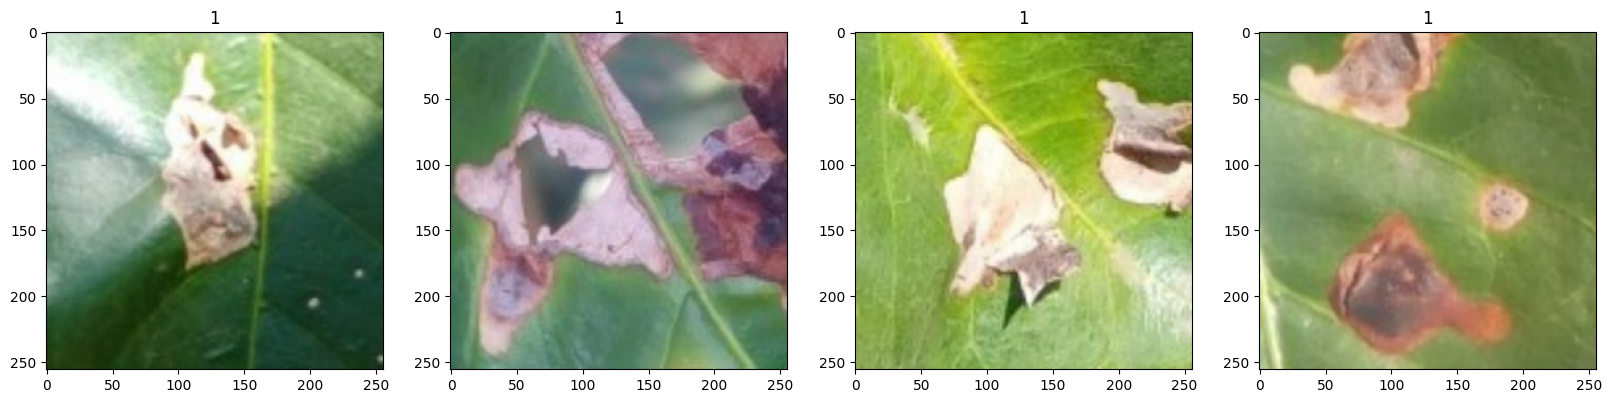

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.42352942, 0.7882353 , 0.6156863 ],
          [0.42352942, 0.7882353 , 0.6156863 ],
          [0.42352942, 0.7882353 , 0.6156863 ],
          ...,
          [0.42647058, 0.7245098 , 0.29803923],
          [0.43235293, 0.73039216, 0.30588236],
          [0.43529412, 0.73333335, 0.30980393]],
 
         [[0.42352942, 0.7872549 , 0.61764705],
          [0.42352942, 0.7872549 , 0.61764705],
          [0.42352942, 0.7872549 , 0.61764705],
          ...,
          [0.4252451 , 0.7232843 , 0.29681373],
          [0.42867646, 0.7267157 , 0.3022059 ],
          [0.43039215, 0.72843134, 0.30490196]],
 
         [[0.42352942, 0.7852941 , 0.6215686 ],
          [0.42352942, 0.7852941 , 0.6215686 ],
          [0.42352942, 0.7852941 , 0.6215686 ],
          ...,
          [0.4227941 , 0.72083336, 0.29436275],
          [0.42132354, 0.71936274, 0.29485294],
          [0.42058823, 0.71862745, 0.29509804]],
 
         ...,
 
         [[0.39019608, 0.76666665, 0.51862746],
          [0.38799

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
35/35 [==============================] - 10s 79ms/step - loss: 0.2123 - accuracy: 0.8884 - val_loss: 3.7826e-04 - val_accuracy: 1.0000
Epoch 2/20
35/35 [==============================] - 5s 133ms/step - loss: 1.6247e-04 - accuracy: 1.0000 - val_loss: 2.0293e-05 - val_accuracy: 1.0000
Epoch 3/20
35/35 [==============================] - 3s 76ms/step - loss: 2.4204e-05 - accuracy: 1.0000 - val_loss: 1.1601e-05 - val_accuracy: 1.0000
Epoch 4/20
35/35 [==============================] - 3s 75ms/step - loss: 7.7822e-06 - accuracy: 1.0000 - val_loss: 7.4361e-06 - val_accuracy: 1.0000
Epoch 5/20
35/35 [==============================] - 4s 110ms/step - loss: 3.9322e-06 - accuracy: 1.0000 - val_loss: 2.9803e-06 - val_accuracy: 1.0000
Epoch 6/20
35/35 [==============================] - 3s 80ms/step - loss: 2.4009e-06 - accuracy: 1.0000 - val_loss: 1.6467e-06 - val_accuracy: 1.0000
Epoch 7/20
35/35 [==============================] - 3s 78ms/step - loss: 2.1386e-06 - accuracy: 1.0000 - va

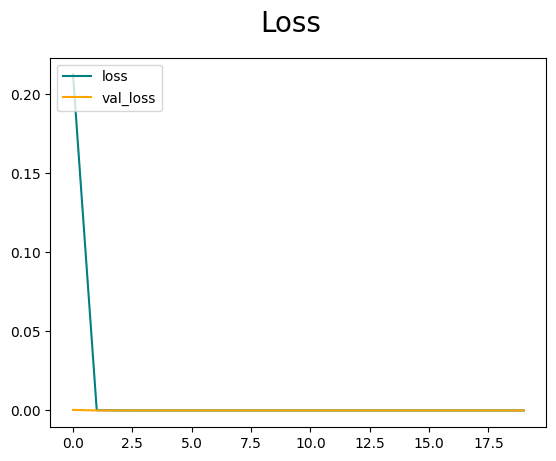

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

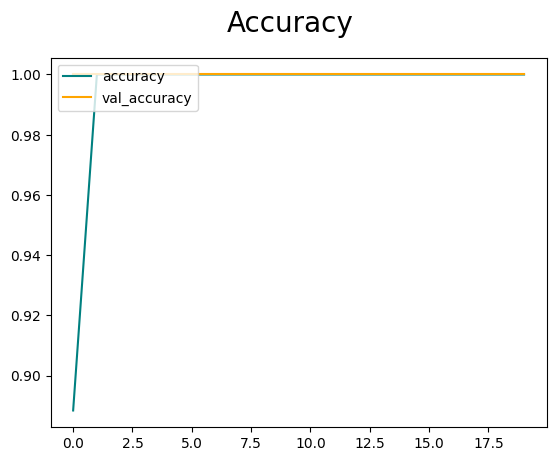

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 403ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


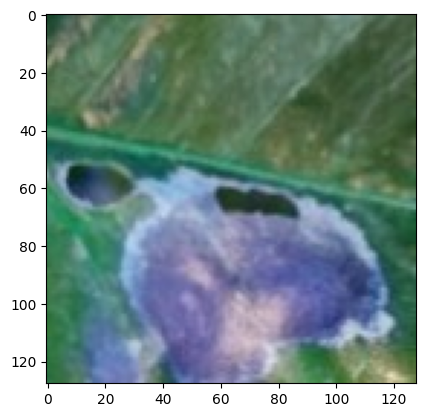

In [ ]:
import cv2
img = cv2.imread('test.jpg')
plt.imshow(img)
plt.show()

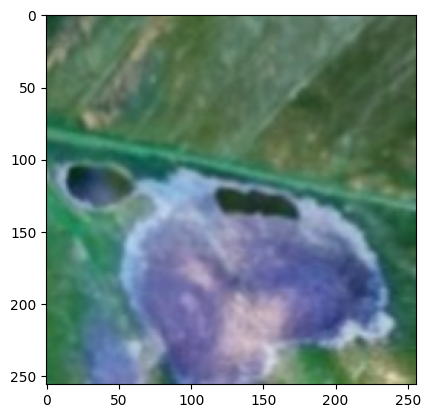

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

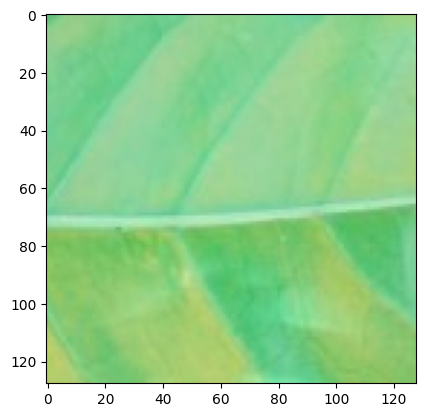

In [ ]:
img2 = cv2.imread('test2.jpg')
plt.imshow(img2)
plt.show()

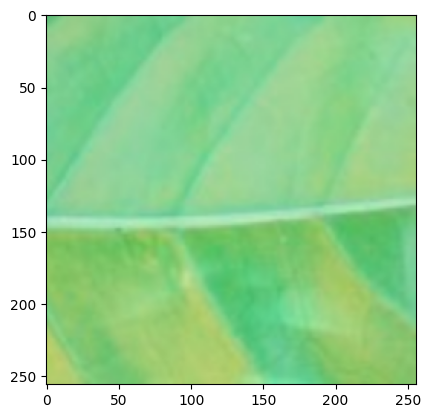

In [ ]:
resize1 = tf.image.resize(img2, (256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [ ]:
yhat1 = model.predict(np.expand_dims(resize1/255, 0))
yhat1


1/1 [==============================] - 0s 28ms/step


array([[3.28709e-06]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Miner')
else:
    print(f'Healthy')

Miner


In [ ]:
if yhat1 > 0.5:
    print(f'Miner')
else:
    print(f'Healthy')

Healthy
